In [1]:
import sys, os
import avstack
import avapi
from copy import copy, deepcopy
import numpy as np
import pandas as pd
from tqdm import tqdm
import pickle

%load_ext autoreload
%autoreload 2

%matplotlib inline

data_dir_carla_infra = '/data/spencer/CARLA/object_infrastructure_40_test'
CSM = avapi.carla.CarlaScenesManager(data_dir_carla_infra, verbose=False)

Cannot import rss library


# Trade Study 1: Using ground truth labels with noise on each element

In [66]:
# constants over all experiments
li_perception = 'pointpillars'
ca_perception = None
tracking = 'basic-box-tracker'
sensor_eval = 'main_lidar'
sensor_eval_super = 'ego'  # to filter out ones from collabs that are behind buildings
filter_front = False
max_lidar_range = 25
max_framerate = 10

# communication range in units of meters
collab_range = {1:100,
                2:100,
                3:70,
                4:50,
                5:None}

# collaborative detection noise (variance) on [h, w, l, x, y, z]
collab_noise = {1:None,
                2:[s**2 for s in [0.2, 0.2, 0.2, 1, 1, 1]],
                3:[s**2 for s in [0.1, 0.1, 0.1, 0.33, 0.33, 33]],
                4:[s**s for s in [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]],
                5:None}

# communication rates in Hz
collab_rate = {1:10,
               2:10,
               3:10,
               4:10,
               5:None}

# source of the collaborative sensing
collab_source = {1:'ground_truth',
                 2:'ground_truth',
                 3:'ground_truth',
                 4:'ground_truth',
                 5:None}

# sensors to use from our dataset
all_collab_sensors = [f'LIDAR_INFRASTRUCTURE_{d:03d}' for d in range(1,40,1)]
collab_sensors = {1:all_collab_sensors,
                  2:all_collab_sensors,
                  3:all_collab_sensors,
                  4:all_collab_sensors,
                  5:None}

# trade study type
trade_types = {1:'collaborative',
               2:'collaborative',
               3:'collaborative',
               4:'collaborative',
               5:'standard'}

# AV configurations
vs = avstack.ego.vehicle
AVs = {1:vs.LidarCollabPerceptionAndTrackingVehicle,
       2:vs.LidarCollabPerceptionAndTrackingVehicle,
       3:vs.LidarCollabPerceptionAndTrackingVehicle,
       4:vs.LidarCollabPerceptionAndTrackingVehicle,
       5:vs.LidarPerceptionAndTrackingVehicle}
SMs = [CSM]

## Run Trades

In [71]:
save_file_base = 'study-3-collaborative-{}-seq-res.p'
frame_res_all, seq_res_all = avapi.evaluation.run_trades(SMs, AVs, li_perception, ca_perception, tracking,
                            max_dist=100, max_lidar_range=max_lidar_range, max_framerate=max_framerate,
                            trade_type=trade_types, sensor_eval=sensor_eval, sensor_eval_super=sensor_eval_super,
                            collaborative_sensors=collab_sensors, n_cases_max=5,
                            collaborative_range=collab_range, collaborative_noise=collab_noise,
                            collaborative_source=collab_source, collaborative_rate=collab_rate,
                            n_trials_max=3, frame_start=100, max_frames=100, filter_front=filter_front,
                            save_file_base=save_file_base)

Running dataset CARLA over 3 trials
   Running trial 0, using index 0
load checkpoint from local path: /home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/work_dirs/hv_pointpillars_fpn_sbn-all_fp16_2x8_2x_carla-3d/latest.pth


/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


      Running dataset: CARLA, case 1


100%|█████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.00it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

22 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    10.9013 sec

All sequences for box-tracker finished in 10.90 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:54<00:00,  1.14s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 803, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 321, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7329005994005994, 'Metrics_tracking_HOTA_HOTA': array([0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535,
       0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535,
       0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535, 0.8339535,
       0.8339535]), 'Metrics_tracking_HOTA_DetA': array([0.72206466, 0.72206466, 0.72206466, 0.72206466, 0.72206466,
       0.72206466, 0.72206466, 0.72206466, 0.72206466, 0.72206466,
       0.72206466, 0.72206466, 0.72206466, 0.72206466, 0.72206466,
       0.72206466, 0.72206466, 0.72206466, 0.72206466]), 'Metrics_tracking_HOTA_AssA': array([0.96318029, 0.96318029, 0.96318029, 0.96318029, 0.96318029,
       0.963

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:25<00:00,  3.91it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

23 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    10.5841 sec

All sequences for box-tracker finished in 10.58 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:30<00:00,  1.51s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 803, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 321, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7329005994005994, 'Metrics_tracking_HOTA_HOTA': array([0.77273554, 0.77273554, 0.77250721, 0.77250721, 0.77250721,
       0.77250721, 0.77250721, 0.77202679, 0.77202679, 0.77202679,
       0.77202679, 0.77202679, 0.77171756, 0.77142347, 0.77142347,
       0.77142347, 0.77142347, 0.7712037 , 0.77055623]), 'Metrics_tracking_HOTA_DetA': array([0.69654428, 0.69654428, 0.69562871, 0.69562871, 0.69562871,
       0.69562871, 0.69562871, 0.69471413, 0.69471413, 0.69471413,
       0.69471413, 0.69471413, 0.69380054, 0.69288793, 0.69288793,
       0.69288793, 0.69288793, 0.69197631, 0.690156  ]), 'Metrics_tracking_HOTA_AssA': array([0.85726096, 0.85726096, 0.85788205, 0.85788205, 0.857

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.29it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

24 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    8.0475 sec

All sequences for box-tracker finished in 8.05 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:25<00:00,  1.17it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 803, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 321, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7329005994005994, 'Metrics_tracking_HOTA_HOTA': array([0.55524449, 0.55524449, 0.55524449, 0.55504887, 0.55504887,
       0.55504887, 0.55504887, 0.55504887, 0.55504887, 0.55504887,
       0.55504887, 0.55504887, 0.55504887, 0.55504887, 0.55504887,
       0.55504887, 0.55504887, 0.55504887, 0.55504887]), 'Metrics_tracking_HOTA_DetA': array([0.36960883, 0.36960883, 0.36960883, 0.36892231, 0.36892231,
       0.36892231, 0.36892231, 0.36892231, 0.36892231, 0.36892231,
       0.36892231, 0.36892231, 0.36892231, 0.36892231, 0.36892231,
       0.36892231, 0.36892231, 0.36892231, 0.36892231]), 'Metrics_tracking_HOTA_AssA': array([0.83411547, 0.83411547, 0.83411547, 0.83507894, 0.835

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:15<00:00,  6.58it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

25 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    8.1644 sec

All sequences for box-tracker finished in 8.16 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:20<00:00,  1.25it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 803, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 321, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7329005994005994, 'Metrics_tracking_HOTA_HOTA': array([0.70353811, 0.70353811, 0.70353811, 0.70353811, 0.70353811,
       0.70353811, 0.70353811, 0.70353811, 0.70353811, 0.70353811,
       0.70353811, 0.70323476, 0.70323476, 0.70323476, 0.70323476,
       0.70300597, 0.70300597, 0.70300597, 0.70300597]), 'Metrics_tracking_HOTA_DetA': array([0.58295455, 0.58295455, 0.58295455, 0.58295455, 0.58295455,
       0.58295455, 0.58295455, 0.58295455, 0.58295455, 0.58295455,
       0.58295455, 0.58205565, 0.58205565, 0.58205565, 0.58205565,
       0.58115778, 0.58115778, 0.58115778, 0.58115778]), 'Metrics_tracking_HOTA_AssA': array([0.84906426, 0.84906426, 0.84906426, 0.84906426, 0.849

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:09<00:00, 10.39it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

26 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    5.7767 sec

All sequences for box-tracker finished in 5.78 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:52<00:00,  1.73s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 5, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 803, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 321, 'Metrics_perception_object_3d_tot_T': 1124, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7329005994005994, 'Metrics_tracking_HOTA_HOTA': array([0.64633356, 0.64633356, 0.64633356, 0.64633356, 0.64633356,
       0.64633356, 0.64633356, 0.64633356, 0.64633356, 0.64633356,
       0.64633356, 0.64633356, 0.64633356, 0.64633356, 0.64633356,
       0.64633356, 0.64633356, 0.64633356, 0.64633356]), 'Metrics_tracking_HOTA_DetA': array([0.49966056, 0.49966056, 0.49966056, 0.49966056, 0.49966056,
       0.49966056, 0.49966056, 0.49966056, 0.49966056, 0.49966056,
       0.49966056, 0.49966056, 0.49966056, 0.49966056, 0.49966056,
       0.49966056, 0.49966056, 0.49966056, 0.49966056]), 'Metrics_tracking_HOTA_AssA': array([0.83606173, 0.83606173, 0.83606173, 0.83606173, 0.836

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.47it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

27 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    10.7329 sec

All sequences for box-tracker finished in 10.73 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:42<00:00,  1.02s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 468, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 537, 'Metrics_perception_object_3d_tot_T': 1005, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.4712002719502719, 'Metrics_tracking_HOTA_HOTA': array([0.46837854, 0.46766298, 0.46766298, 0.46766298, 0.46766298,
       0.46766298, 0.46766298, 0.46766298, 0.46766298, 0.4671    ,
       0.4671    , 0.4671    , 0.4671    , 0.4671    , 0.4671    ,
       0.4671    , 0.4671    , 0.4671    , 0.46654068]), 'Metrics_tracking_HOTA_DetA': array([0.32536765, 0.32439383, 0.32439383, 0.32439383, 0.32439383,
       0.32439383, 0.32439383, 0.32439383, 0.32439383, 0.32390746,
       0.32390746, 0.32390746, 0.32390746, 0.32390746, 0.32390746,
       0.32390746, 0.32390746, 0.32390746, 0.32342144]), 'Metrics_tracking_HOTA_AssA': array([0.67424791, 0.67420723, 0.67420723, 0.67420723, 0.674

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:22<00:00,  4.38it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

28 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    10.1865 sec

All sequences for box-tracker finished in 10.19 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:10<00:00,  1.31s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 468, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 537, 'Metrics_perception_object_3d_tot_T': 1005, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.4712002719502719, 'Metrics_tracking_HOTA_HOTA': array([0.43460624, 0.43373653, 0.43362283, 0.43362283, 0.43362283,
       0.43362283, 0.43352856, 0.43343023, 0.43343023, 0.43284442,
       0.432753  , 0.432753  , 0.432753  , 0.432753  , 0.432753  ,
       0.432753  , 0.432753  , 0.43266344, 0.43197133]), 'Metrics_tracking_HOTA_DetA': array([0.31628582, 0.31533164, 0.31485507, 0.31485507, 0.31485507,
       0.31485507, 0.31437885, 0.31390297, 0.31390297, 0.31342743,
       0.31295224, 0.31295224, 0.31295224, 0.31295224, 0.31295224,
       0.31295224, 0.31295224, 0.3124774 , 0.31152873]), 'Metrics_tracking_HOTA_AssA': array([0.59718955, 0.59660166, 0.59719144, 0.59719144, 0.597

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:16<00:00,  6.03it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

29 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    9.3658 sec

All sequences for box-tracker finished in 9.37 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:10<00:00,  1.30s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 468, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 537, 'Metrics_perception_object_3d_tot_T': 1005, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.4712002719502719, 'Metrics_tracking_HOTA_HOTA': array([0.31809547, 0.31752527, 0.31752527, 0.31752527, 0.31752527,
       0.31752527, 0.31752527, 0.31752527, 0.31752527, 0.31752527,
       0.31684967, 0.31684967, 0.31684967, 0.31684967, 0.31684967,
       0.31684967, 0.31684967, 0.31684967, 0.31630371]), 'Metrics_tracking_HOTA_DetA': array([0.15493911, 0.15454853, 0.15454853, 0.15454853, 0.15454853,
       0.15454853, 0.15454853, 0.15454853, 0.15454853, 0.15454853,
       0.15415822, 0.15415822, 0.15415822, 0.15415822, 0.15415822,
       0.15415822, 0.15415822, 0.15415822, 0.15376816]), 'Metrics_tracking_HOTA_AssA': array([0.65306125, 0.65236658, 0.65236658, 0.65236658, 0.652

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.00it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

30 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    7.0002 sec

All sequences for box-tracker finished in 7.00 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:18<00:00,  1.28it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 468, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 537, 'Metrics_perception_object_3d_tot_T': 1005, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.4712002719502719, 'Metrics_tracking_HOTA_HOTA': array([0.41881052, 0.41881052, 0.41819326, 0.41819326, 0.41819326,
       0.41819326, 0.41819326, 0.41819326, 0.41819326, 0.41819326,
       0.41746965, 0.41746965, 0.41662976, 0.41662976, 0.41662976,
       0.41662976, 0.41662976, 0.41662976, 0.41662976]), 'Metrics_tracking_HOTA_DetA': array([0.26657645, 0.26657645, 0.26600541, 0.26600541, 0.26600541,
       0.26600541, 0.26600541, 0.26600541, 0.26600541, 0.26600541,
       0.26543488, 0.26543488, 0.26486486, 0.26486486, 0.26486486,
       0.26486486, 0.26486486, 0.26486486, 0.26486486]), 'Metrics_tracking_HOTA_AssA': array([0.65798102, 0.65798102, 0.65745129, 0.65745129, 0.657

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.05it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

31 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    5.5381 sec

All sequences for box-tracker finished in 5.54 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:19<00:00,  1.39s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 5, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 468, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 537, 'Metrics_perception_object_3d_tot_T': 1005, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.4712002719502719, 'Metrics_tracking_HOTA_HOTA': array([0.47588403, 0.47588403, 0.47492668, 0.47492668, 0.47492668,
       0.47492668, 0.47492668, 0.47492668, 0.47492668, 0.47492668,
       0.47381139, 0.47381139, 0.47381139, 0.47381139, 0.47381139,
       0.47381139, 0.47381139, 0.47381139, 0.47381139]), 'Metrics_tracking_HOTA_DetA': array([0.34398782, 0.34398782, 0.34296578, 0.34296578, 0.34296578,
       0.34296578, 0.34296578, 0.34296578, 0.34296578, 0.34296578,
       0.34194529, 0.34194529, 0.34194529, 0.34194529, 0.34194529,
       0.34194529, 0.34194529, 0.34194529, 0.34194529]), 'Metrics_tracking_HOTA_AssA': array([0.65835357, 0.65835357, 0.65766139, 0.65766139, 0.657

100%|█████████████████████████████████████████████████████████████████| 100/100 [01:02<00:00,  1.60it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

32 eval_sequence(run_2022_10_31_13:57:59, box-tracker)                    22.8662 sec

All sequences for box-tracker finished in 22.87 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:22<00:00,  1.21it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 638, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 587, 'Metrics_perception_object_3d_tot_T': 1225, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5203768168106404, 'Metrics_tracking_HOTA_HOTA': array([0.55382742, 0.55382742, 0.55382742, 0.55364006, 0.55357927,
       0.55357927, 0.55357927, 0.55357927, 0.55357927, 0.55357927,
       0.55357927, 0.55357927, 0.55357927, 0.55357927, 0.55357927,
       0.55357927, 0.55357927, 0.55357927, 0.55357927]), 'Metrics_tracking_HOTA_DetA': array([0.33268859, 0.33268859, 0.33268859, 0.3318299 , 0.33154391,
       0.33154391, 0.33154391, 0.33154391, 0.33154391, 0.33154391,
       0.33154391, 0.33154391, 0.33154391, 0.33154391, 0.33154391,
       0.33154391, 0.33154391, 0.33154391, 0.33154391]), 'Metrics_tracking_HOTA_AssA': array([0.92195771, 0.92195771, 0.92195771, 0.9237182 , 0.924

100%|█████████████████████████████████████████████████████████████████| 100/100 [01:00<00:00,  1.64it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

33 eval_sequence(run_2022_10_31_13:57:59, box-tracker)                    23.0690 sec

All sequences for box-tracker finished in 23.07 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:20<00:00,  1.24it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 638, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 587, 'Metrics_perception_object_3d_tot_T': 1225, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5203768168106404, 'Metrics_tracking_HOTA_HOTA': array([0.51726734, 0.51726734, 0.51700348, 0.51700348, 0.51700348,
       0.51700348, 0.51700348, 0.51693329, 0.51693329, 0.51693329,
       0.51693329, 0.51693329, 0.51693329, 0.51688005, 0.51636817,
       0.51630622, 0.51605032, 0.51605032, 0.51605032]), 'Metrics_tracking_HOTA_DetA': array([0.32227392, 0.32227392, 0.32200647, 0.32200647, 0.32200647,
       0.32200647, 0.32200647, 0.32173913, 0.32173913, 0.32173913,
       0.32173913, 0.32173913, 0.32173913, 0.3214719 , 0.32120477,
       0.32093775, 0.32067084, 0.32067084, 0.32067084]), 'Metrics_tracking_HOTA_AssA': array([0.83024249, 0.83024249, 0.83008455, 0.83008455, 0.830

100%|█████████████████████████████████████████████████████████████████| 100/100 [01:13<00:00,  1.37it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

34 eval_sequence(run_2022_10_31_13:57:59, box-tracker)                    27.1305 sec

All sequences for box-tracker finished in 27.13 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:23<00:00,  1.43s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 638, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 587, 'Metrics_perception_object_3d_tot_T': 1225, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5203768168106404, 'Metrics_tracking_HOTA_HOTA': array([0.21572001, 0.21540599, 0.21536791, 0.21535277, 0.21530436,
       0.21526978, 0.21526978, 0.21526978, 0.21526978, 0.21519452,
       0.21512847, 0.2151081 , 0.2151081 , 0.21477893, 0.21473919,
       0.21473919, 0.21467652, 0.21464592, 0.2145312 ]), 'Metrics_tracking_HOTA_DetA': array([0.08689078, 0.08651163, 0.08625901, 0.08613274, 0.0858803 ,
       0.08575413, 0.08575413, 0.08575413, 0.08575413, 0.08537577,
       0.08487171, 0.08474576, 0.08474576, 0.08436811, 0.08411649,
       0.08411649, 0.08386498, 0.08373927, 0.08336232]), 'Metrics_tracking_HOTA_AssA': array([0.53555884, 0.53634109, 0.53772163, 0.5384342 , 0.539

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.20it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

35 eval_sequence(run_2022_10_31_13:57:59, box-tracker)                    18.2688 sec

All sequences for box-tracker finished in 18.27 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [01:33<00:00,  1.07it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 638, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 587, 'Metrics_perception_object_3d_tot_T': 1225, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5203768168106404, 'Metrics_tracking_HOTA_HOTA': array([0.54292189, 0.54292189, 0.54292189, 0.54292189, 0.54292189,
       0.54292189, 0.54292189, 0.54282767, 0.54282767, 0.54282767,
       0.54282767, 0.54282767, 0.54282767, 0.54282767, 0.54282767,
       0.54282767, 0.54282767, 0.54282767, 0.54274242]), 'Metrics_tracking_HOTA_DetA': array([0.33668224, 0.33668224, 0.33668224, 0.33668224, 0.33668224,
       0.33668224, 0.33668224, 0.33637001, 0.33637001, 0.33637001,
       0.33637001, 0.33637001, 0.33637001, 0.33637001, 0.33637001,
       0.33637001, 0.33637001, 0.33637001, 0.33605792]), 'Metrics_tracking_HOTA_AssA': array([0.87549667, 0.87549667, 0.87549667, 0.87549667, 0.875

100%|█████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.68it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

36 eval_sequence(run_2022_10_31_13:57:59, box-tracker)                    6.0364 sec

All sequences for box-tracker finished in 6.04 seconds


100%|█████████████████████████████████████████████████████████████████| 100/100 [02:34<00:00,  1.55s/it]

{'Case': 5, 'Dataset': 'CARLA', 'Trial': 2, 'Metrics_perception_object_3d_tot_TP': 638, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 587, 'Metrics_perception_object_3d_tot_T': 1225, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5203768168106404, 'Metrics_tracking_HOTA_HOTA': array([0.45414221, 0.45414221, 0.45414221, 0.45414221, 0.45414221,
       0.45414221, 0.45414221, 0.45414221, 0.45414221, 0.45414221,
       0.45414221, 0.45414221, 0.45414221, 0.45414221, 0.45414221,
       0.45414221, 0.45414221, 0.45414221, 0.45414221]), 'Metrics_tracking_HOTA_DetA': array([0.35014327, 0.35014327, 0.35014327, 0.35014327, 0.35014327,
       0.35014327, 0.35014327, 0.35014327, 0.35014327, 0.35014327,
       0.35014327, 0.35014327, 0.35014327, 0.35014327, 0.35014327,
       0.35014327, 0.35014327, 0.35014327, 0.35014327]), 'Metrics_tracking_HOTA_AssA': array([0.58903074, 0.58903074, 0.58903074, 0.58903074, 0.589

<Figure size 640x480 with 0 Axes>

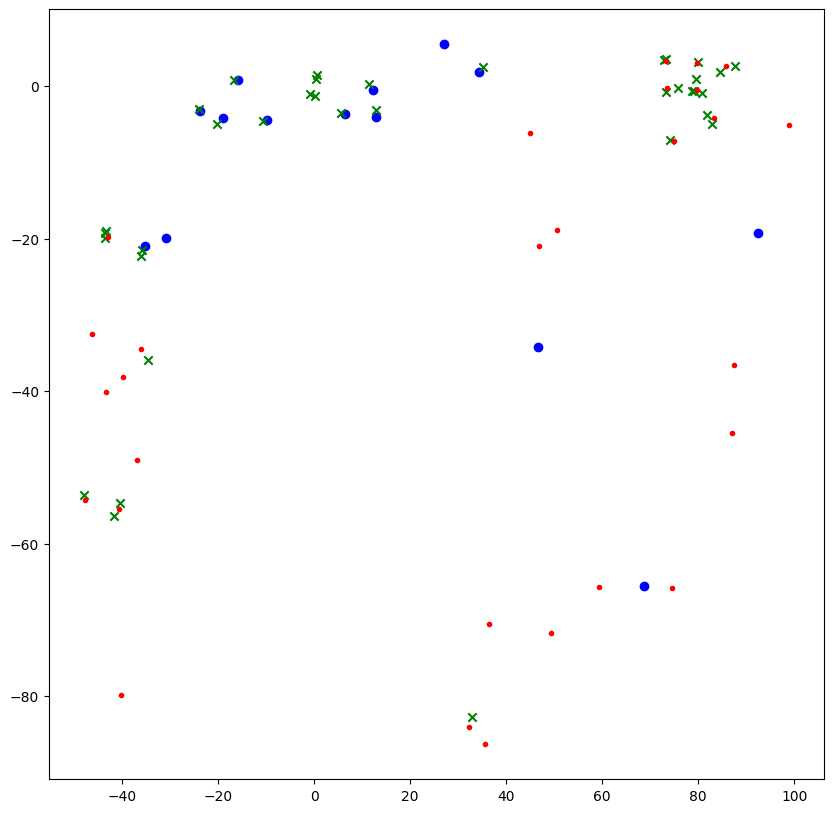

In [57]:
idx_frame = 17
i_case = 2
x_dets = np.array([obj.box.t.vector for obj in frame_res_all[0][i_case-1][idx_frame]['Result_tracking'].get_objects_of('detections')])
x_trus = np.array([obj.box.t.vector for obj in frame_res_all[0][i_case-1][idx_frame]['Result_tracking'].get_objects_of('truths')])
x_igns = np.array([obj.box.t.vector for obj in frame_res_all[0][i_case-1][idx_frame]['Result_tracking'].truths_dontcare])


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
plt.scatter(x_trus[:,0], x_trus[:,1], c='blue', marker='o')
plt.scatter(x_dets[:,0], x_dets[:,1], c='green', marker='x')
plt.scatter(x_igns[:,0], x_igns[:,1], c='red', marker='.')
plt.show()

# Trade Study 2: Using real detections at different distances

In [76]:
# constants over all experiments
li_perception = 'pointpillars'
ca_perception = None
tracking = 'basic-box-tracker'
sensor_eval = 'main_lidar'
sensor_eval_super = 'ego'  # to filter out ones from collabs that are behind buildings
filter_front = False
max_lidar_range = 25
max_framerate = 10

# communication range in units of meters
collab_range = {1:70,
                2:70,
                3:70,
                4:None}

# collaborative detection noise (variance) on [h, w, l, x, y, z]
collab_noise = {1:None,
                2:[s**2 for s in [0.2, 0.2, 0.2, 1, 1, 1]],
                3:[s**s for s in [0.05, 0.05, 0.05, 0.1, 0.1, 0.1]],
                4:None}

# communication rates in Hz
collab_rate = {1:10,
               2:10,
               3:5,
               4:None}

# source of the collaborative sensing
collab_source = {1:'ground_truth',
                 2:'ground_truth',
                 3:'ground_truth',
                 4:None}

# sensors to use from our dataset
all_collab_sensors = [f'LIDAR_INFRASTRUCTURE_{d:03d}' for d in range(1,40,1)]
collab_sensors = {1:all_collab_sensors,
                  2:all_collab_sensors,
                  3:all_collab_sensors,
                  4:None}

# trade study type
trade_types = {1:'collaborative',
               2:'collaborative',
               3:'collaborative',
               4:'standard'}

# AV configurations
vs = avstack.ego.vehicle
AVs = {1:vs.LidarCollabPerceptionAndTrackingVehicle,
       2:vs.LidarCollabPerceptionAndTrackingVehicle,
       3:vs.LidarCollabPerceptionAndTrackingVehicle,
       4:vs.LidarPerceptionAndTrackingVehicle}
SMs = [CSM]

In [81]:
save_file_base = 'study-3-collaborative-{}-seq-res-EXP2.p'
max_dist = 70
frame_res_all, seq_res_all = avapi.evaluation.run_trades(SMs, AVs, li_perception, ca_perception, tracking,
                            max_dist=max_dist, max_lidar_range=max_lidar_range, max_framerate=max_framerate,
                            trade_type=trade_types, sensor_eval=sensor_eval, sensor_eval_super=sensor_eval_super,
                            collaborative_sensors=collab_sensors, n_cases_max=4,
                            collaborative_range=collab_range, collaborative_noise=collab_noise,
                            collaborative_source=collab_source, collaborative_rate=collab_rate,
                            n_trials_max=2, frame_start=120, max_frames=50, filter_front=filter_front,
                            save_file_base=save_file_base)

Running dataset CARLA over 2 trials
   Running trial 0, using index 0
load checkpoint from local path: /home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/work_dirs/hv_pointpillars_fpn_sbn-all_fp16_2x8_2x_carla-3d/latest.pth
      Running dataset: CARLA, case 1


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.26it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

39 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    3.3380 sec

All sequences for box-tracker finished in 3.34 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:41<00:00,  1.21it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 405, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 155, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7287832167832168, 'Metrics_tracking_HOTA_HOTA': array([0.80039242, 0.80039242, 0.80039242, 0.80039242, 0.80039242,
       0.80039242, 0.80039242, 0.80039242, 0.80039242, 0.80039242,
       0.80039242, 0.80039242, 0.80039242, 0.80039242, 0.80039242,
       0.80039242, 0.80039242, 0.80039242, 0.80039242]), 'Metrics_tracking_HOTA_DetA': array([0.70079787, 0.70079787, 0.70079787, 0.70079787, 0.70079787,
       0.70079787, 0.70079787, 0.70079787, 0.70079787, 0.70079787,
       0.70079787, 0.70079787, 0.70079787, 0.70079787, 0.70079787,
       0.70079787, 0.70079787, 0.70079787, 0.70079787]), 'Metrics_tracking_HOTA_AssA': array([0.91414094, 0.91414094, 0.91414094, 0.91414094, 0.9141

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:07<00:00,  7.03it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

40 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    3.3028 sec

All sequences for box-tracker finished in 3.30 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.04s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 405, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 155, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7287832167832168, 'Metrics_tracking_HOTA_HOTA': array([0.79048602, 0.79048602, 0.79048602, 0.79048602, 0.79048602,
       0.79048602, 0.78968171, 0.78968171, 0.78968171, 0.78968171,
       0.78968171, 0.78968171, 0.78968171, 0.78968171, 0.78968171,
       0.78968171, 0.78968171, 0.78968171, 0.78968171]), 'Metrics_tracking_HOTA_DetA': array([0.69668874, 0.69668874, 0.69668874, 0.69668874, 0.69668874,
       0.69668874, 0.69444444, 0.69444444, 0.69444444, 0.69444444,
       0.69444444, 0.69444444, 0.69444444, 0.69444444, 0.69444444,
       0.69444444, 0.69444444, 0.69444444, 0.69444444]), 'Metrics_tracking_HOTA_AssA': array([0.89691151, 0.89691151, 0.89691151, 0.89691151, 0.8969

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.58it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

41 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    3.2436 sec

All sequences for box-tracker finished in 3.24 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:43<00:00,  1.16it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 405, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 155, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7287832167832168, 'Metrics_tracking_HOTA_HOTA': array([0.77448932, 0.77448932, 0.77448932, 0.77448932, 0.77448932,
       0.77448932, 0.77448932, 0.77448932, 0.77448932, 0.77448932,
       0.77448932, 0.77448932, 0.77376733, 0.77376733, 0.77376733,
       0.77376733, 0.77376733, 0.77376733, 0.77376733]), 'Metrics_tracking_HOTA_DetA': array([0.66353887, 0.66353887, 0.66353887, 0.66353887, 0.66353887,
       0.66353887, 0.66353887, 0.66353887, 0.66353887, 0.66353887,
       0.66353887, 0.66353887, 0.66131191, 0.66131191, 0.66131191,
       0.66131191, 0.66131191, 0.66131191, 0.66131191]), 'Metrics_tracking_HOTA_AssA': array([0.9039918 , 0.9039918 , 0.9039918 , 0.9039918 , 0.9039

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 10.53it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

42 eval_sequence(run_2022_10_31_13:34:52, box-tracker)                    2.5386 sec

All sequences for box-tracker finished in 2.54 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:55<00:00,  1.12s/it]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 0, 'Metrics_perception_object_3d_tot_TP': 405, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 155, 'Metrics_perception_object_3d_tot_T': 560, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.7287832167832168, 'Metrics_tracking_HOTA_HOTA': array([0.7363959, 0.7363959, 0.7363959, 0.7363959, 0.7363959, 0.7363959,
       0.7363959, 0.7363959, 0.7363959, 0.7363959, 0.7363959, 0.7363959,
       0.7363959, 0.7363959, 0.7363959, 0.7363959, 0.7363959, 0.7363959,
       0.7363959]), 'Metrics_tracking_HOTA_DetA': array([0.60197368, 0.60197368, 0.60197368, 0.60197368, 0.60197368,
       0.60197368, 0.60197368, 0.60197368, 0.60197368, 0.60197368,
       0.60197368, 0.60197368, 0.60197368, 0.60197368, 0.60197368,
       0.60197368, 0.60197368, 0.60197368, 0.60197368]), 'Metrics_tracking_HOTA_AssA': array([0.90083492, 0.90083492, 0.90083492, 0.90083492, 0.90083492,
       0.9008

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.97it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

43 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    3.5055 sec

All sequences for box-tracker finished in 3.51 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:40<00:00,  1.23it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 1, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 296, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 256, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5462556332556332, 'Metrics_tracking_HOTA_HOTA': array([0.46364566, 0.46364566, 0.46364566, 0.46364566, 0.46364566,
       0.46364566, 0.46364566, 0.46364566, 0.46364566, 0.46364566,
       0.46364566, 0.46364566, 0.46364566, 0.46364566, 0.46269675,
       0.46269675, 0.46269675, 0.46269675, 0.46269675]), 'Metrics_tracking_HOTA_DetA': array([0.28116531, 0.28116531, 0.28116531, 0.28116531, 0.28116531,
       0.28116531, 0.28116531, 0.28116531, 0.28116531, 0.28116531,
       0.28116531, 0.28116531, 0.28116531, 0.28116531, 0.2802979 ,
       0.2802979 , 0.2802979 , 0.2802979 , 0.2802979 ]), 'Metrics_tracking_HOTA_AssA': array([0.76455838, 0.76455838, 0.76455838, 0.76455838, 0.7645

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:06<00:00,  7.88it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

44 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    3.5102 sec

All sequences for box-tracker finished in 3.51 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:47<00:00,  1.04it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 2, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 296, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 256, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5462556332556332, 'Metrics_tracking_HOTA_HOTA': array([0.42298749, 0.42298749, 0.42298749, 0.42298749, 0.42298749,
       0.42298749, 0.42298749, 0.42298749, 0.42298749, 0.42282027,
       0.42282027, 0.42282027, 0.42282027, 0.42282027, 0.42181741,
       0.42181741, 0.42181741, 0.42181741, 0.42181741]), 'Metrics_tracking_HOTA_DetA': array([0.27822581, 0.27822581, 0.27822581, 0.27822581, 0.27822581,
       0.27822581, 0.27822581, 0.27822581, 0.27822581, 0.27736736,
       0.27736736, 0.27736736, 0.27736736, 0.27736736, 0.27651007,
       0.27651007, 0.27651007, 0.27651007, 0.27651007]), 'Metrics_tracking_HOTA_AssA': array([0.64306911, 0.64306911, 0.64306911, 0.64306911, 0.6430

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  8.49it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

45 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    3.3518 sec

All sequences for box-tracker finished in 3.35 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [00:42<00:00,  1.17it/s]
/home/spencer/Documents/Projects/Research/avstack-studies/submodules/lib-avstack/third_party/mmdetection3d/mmdet3d/models/dense_heads/anchor3d_head.py:84: UserWarning: dir_offset and dir_limit_offset will be depressed and be incorporated into box coder in the future
  warnings.warn(


{'Case': 3, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 296, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 256, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5462556332556332, 'Metrics_tracking_HOTA_HOTA': array([0.42186525, 0.42186525, 0.42166261, 0.42166261, 0.42166261,
       0.42166261, 0.42166261, 0.42166261, 0.42166261, 0.42146488,
       0.42146488, 0.42146488, 0.42146488, 0.42146488, 0.42042836,
       0.42042836, 0.41986525, 0.41986525, 0.41925098]), 'Metrics_tracking_HOTA_DetA': array([0.26005548, 0.26005548, 0.25918226, 0.25918226, 0.25918226,
       0.25918226, 0.25918226, 0.25918226, 0.25918226, 0.25831025,
       0.25831025, 0.25831025, 0.25831025, 0.25831025, 0.25743945,
       0.25743945, 0.25656985, 0.25656985, 0.25570145]), 'Metrics_tracking_HOTA_AssA': array([0.68435508, 0.68435508, 0.68600125, 0.68600125, 0.6860

100%|███████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.26it/s]



CLEAR Config:
THRESHOLD            : 0.5                           
PRINT_CONFIG         : True                          

IDEucl Config:
THRESHOLD            : 0.4                           
PRINT_CONFIG         : True                          

Evaluating 1 tracker(s) on 1 sequence(s) for 1 class(es) on AvstackTrackDataset dataset using the following metrics: HOTA, CLEAR, VACE, IDEucl, Count


Evaluating box-tracker

46 eval_sequence(run_2022_10_31_13:46:21, box-tracker)                    2.3820 sec

All sequences for box-tracker finished in 2.38 seconds


100%|███████████████████████████████████████████████████████████████████| 50/50 [01:00<00:00,  1.21s/it]


{'Case': 4, 'Dataset': 'CARLA', 'Trial': 1, 'Metrics_perception_object_3d_tot_TP': 296, 'Metrics_perception_object_3d_tot_FP': 0, 'Metrics_perception_object_3d_tot_FN': 256, 'Metrics_perception_object_3d_tot_T': 552, 'Metrics_perception_object_3d_mean_precision': 1.0, 'Metrics_perception_object_3d_mean_recall': 0.5462556332556332, 'Metrics_tracking_HOTA_HOTA': array([0.58251467, 0.58251467, 0.58251467, 0.58251467, 0.58251467,
       0.58251467, 0.58251467, 0.58251467, 0.58251467, 0.58251467,
       0.58251467, 0.58251467, 0.58251467, 0.58251467, 0.58251467,
       0.58251467, 0.58251467, 0.58060222, 0.58060222]), 'Metrics_tracking_HOTA_DetA': array([0.47058824, 0.47058824, 0.47058824, 0.47058824, 0.47058824,
       0.47058824, 0.47058824, 0.47058824, 0.47058824, 0.47058824,
       0.47058824, 0.47058824, 0.47058824, 0.47058824, 0.47058824,
       0.47058824, 0.47058824, 0.46818923, 0.46818923]), 'Metrics_tracking_HOTA_AssA': array([0.7210621 , 0.7210621 , 0.7210621 , 0.7210621 , 0.7210

<Figure size 640x480 with 0 Axes>

In [4]:
seq_res_all

[[{'Case': 1,
   'Dataset': 'CARLA',
   'Trial': 0,
   'Metrics_perception_object_3d_tot_TP': 214,
   'Metrics_perception_object_3d_tot_FP': 0,
   'Metrics_perception_object_3d_tot_FN': 173,
   'Metrics_perception_object_3d_tot_T': 387,
   'Metrics_perception_object_3d_mean_precision': 1.0,
   'Metrics_perception_object_3d_mean_recall': 0.5565800865800866,
   'Metrics_tracking_HOTA_HOTA': array([0.39926795, 0.39463659, 0.39463659, 0.39463659, 0.39463659,
          0.39463659, 0.38724914, 0.3697228 , 0.34806124, 0.33564883,
          0.31641804, 0.30839593, 0.29611816, 0.269327  , 0.22582769,
          0.19337223, 0.15009072, 0.09697737, 0.07130367]),
   'Metrics_tracking_HOTA_DetA': array([0.28368121, 0.27641509, 0.27641509, 0.27641509, 0.27641509,
          0.27641509, 0.27161654, 0.26212687, 0.24700461, 0.23901099,
          0.22222222, 0.21454219, 0.19522968, 0.17142857, 0.14467005,
          0.12003311, 0.08674699, 0.04559505, 0.0281155 ]),
   'Metrics_tracking_HOTA_AssA': array([0

In [242]:
SM.sensor_file_post.keys()

dict_keys(['CAM_FRONT', 'LIDAR_INFRASTRUCTURE_001', 'LIDAR_INFRASTRUCTURE_002', 'LIDAR_INFRASTRUCTURE_003', 'LIDAR_INFRASTRUCTURE_004', 'LIDAR_INFRASTRUCTURE_005', 'LIDAR_INFRASTRUCTURE_006', 'LIDAR_INFRASTRUCTURE_007', 'LIDAR_INFRASTRUCTURE_008', 'LIDAR_INFRASTRUCTURE_009', 'LIDAR_INFRASTRUCTURE_010', 'LIDAR_INFRASTRUCTURE_011', 'LIDAR_INFRASTRUCTURE_012', 'LIDAR_INFRASTRUCTURE_013', 'LIDAR_INFRASTRUCTURE_014', 'LIDAR_INFRASTRUCTURE_015', 'LIDAR_INFRASTRUCTURE_016', 'LIDAR_INFRASTRUCTURE_017', 'LIDAR_INFRASTRUCTURE_018', 'LIDAR_INFRASTRUCTURE_019', 'LIDAR_INFRASTRUCTURE_020', 'LIDAR_INFRASTRUCTURE_021', 'LIDAR_INFRASTRUCTURE_022', 'LIDAR_INFRASTRUCTURE_023', 'LIDAR_INFRASTRUCTURE_024', 'LIDAR_INFRASTRUCTURE_025', 'LIDAR_INFRASTRUCTURE_026', 'LIDAR_INFRASTRUCTURE_027', 'LIDAR_INFRASTRUCTURE_028', 'LIDAR_INFRASTRUCTURE_029', 'LIDAR_INFRASTRUCTURE_030', 'LIDAR_INFRASTRUCTURE_031', 'LIDAR_INFRASTRUCTURE_032', 'LIDAR_INFRASTRUCTURE_033', 'LIDAR_INFRASTRUCTURE_034', 'LIDAR_INFRASTRUCTURE_03

In [4]:
SM = CSM.get_scene_dataset_by_index(0)

In [204]:
# collaborative detection noise (variance) on [h, w, l, x, y, z]
collab_noise = {1:[s**2 for s in [0.2, 0.2, 0.2, 1, 1, 1]],
                2:[s**2 for s in [0.1, 0.1, 0.1, 0.5, 0.5, 2]],
                3:[s**s for s in [0.05, 0.05, 0.05, 0.25, 0.25, 0.25]],
                4:None}

n_assign = []
for i_test in range(1,4):
    n_assign_this = []
    for i_trial in range(100):
        objs_1 = SM.get_objects(frame=10, sensor='LIDAR_INFRASTRUCTURE_001')
        for obj in objs_1:
            obj.box.add_noise(collab_noise[i_test])

        objs_2 = SM.get_objects(frame=12, sensor='LIDAR_INFRASTRUCTURE_001')
        for obj in objs_2:
            obj.box.add_noise(collab_noise[i_test])

        A_noise = avstack.modules.assignment.build_A_from_iou([obj.box for obj in objs_1], [obj.box for obj in objs_2])
        n_assign_this.append(np.sum(A_noise!=0))
    n_assign.append(n_assign_this)
        #     print(len(objs_1), len(objs_2), np.sum(A_noise!=0))

(array([[ 0.,  0.,  0.,  5., 11., 17., 34., 18., 12.,  3.],
        [ 2.,  3., 12., 37., 20., 18.,  6.,  2.,  0.,  0.],
        [ 0.,  0.,  1., 11., 11., 13., 36., 18.,  6.,  4.]]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <a list of 3 BarContainer objects>)

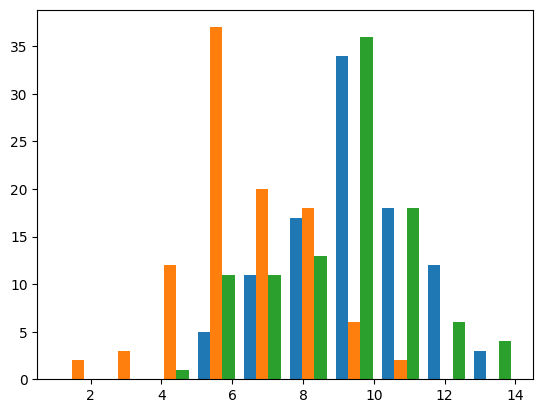

In [205]:
import matplotlib.pyplot as plt
plt.hist(n_assign)

In [167]:
A_reg = avstack.modules.assignment.build_A_from_iou([obj.box for obj in objs_1], [obj.box for obj in objs_2])
print(len(objs_1), len(objs_2), np.sum(A_reg!=0))

14 13 13


In [138]:
objs_1

array([VehicleState car at position Translation at [56.488952, -15.378056, 15.405418] with origin of x:[-92.907332 -28.650821  15.017219], q:quaternion(-0.68029, 0.183739, 0.182283, -0.685724),
       VehicleState truck at position Translation at [59.674094, -17.961276, 16.913199] with origin of x:[-92.907332 -28.650821  15.017219], q:quaternion(-0.68029, 0.183739, 0.182283, -0.685724),
       VehicleState truck at position Translation at [46.689232, -17.613918, 9.466878] with origin of x:[-92.907332 -28.650821  15.017219], q:quaternion(-0.68029, 0.183739, 0.182283, -0.685724),
       VehicleState truck at position Translation at [23.179778, -3.354969, -4.106296] with origin of x:[-92.907332 -28.650821  15.017219], q:quaternion(-0.68029, 0.183739, 0.182283, -0.685724),
       VehicleState car at position Translation at [49.684616, -14.897358, 11.250742] with origin of x:[-92.907332 -28.650821  15.017219], q:quaternion(-0.68029, 0.183739, 0.182283, -0.685724),
       VehicleState bicycl

In [139]:
objs_2

array([VehicleState car at position Translation at [56.472471, -15.346423, 15.430301] with origin of x:[-92.961448 -28.593684  15.088278], q:quaternion(-0.679987, 0.183385, 0.182578, -0.686042),
       VehicleState truck at position Translation at [59.62864, -17.960731, 16.994307] with origin of x:[-92.961448 -28.593684  15.088278], q:quaternion(-0.679987, 0.183385, 0.182578, -0.686042),
       VehicleState truck at position Translation at [46.646973, -17.617919, 9.539933] with origin of x:[-92.961448 -28.593684  15.088278], q:quaternion(-0.679987, 0.183385, 0.182578, -0.686042),
       VehicleState truck at position Translation at [23.141075, -3.355029, -4.031189] with origin of x:[-92.961448 -28.593684  15.088278], q:quaternion(-0.679987, 0.183385, 0.182578, -0.686042),
       VehicleState car at position Translation at [49.65604, -14.947966, 11.299989] with origin of x:[-92.961448 -28.593684  15.088278], q:quaternion(-0.679987, 0.183385, 0.182578, -0.686042),
       VehicleState car

In [111]:
[f['n_collab_sensors_in_view'] for f in frame_res_all[0][0]]

[10, 10, 10, 10, 11, 11, 12, 12, 12, 12]

In [75]:
frame_res_all[0][0][idx_frame]

{'Case': 1,
 'Dataset': 'CARLA',
 'Trial': 0,
 'Frame': 112,
 'collab_detections': [motorcycle detection from sensor LIDAR_INFRASTRUCTURE_014
  Box3D=[h: 1.56, w: -0.73, l: 1.67] x (x: 29.91 y: 4.49, z: 1.27)
    q: quaternion(0.190149, -0.25941, 0.083871, 0.94315) with origin: origin of x:[-32.492253  74.492033  14.965723], q:quaternion(0.002485, -0.258812, -0.000661, 0.965925),
  truck detection from sensor LIDAR_INFRASTRUCTURE_014
  Box3D=[h: 2.31, w: 2.11, l: 6.34] x (x: 27.53 y: -0.56, z: -4.07)
    q: quaternion(-0.965758, 0.006343, -0.25772, -0.029457) with origin: origin of x:[-32.492253  74.492033  14.965723], q:quaternion(0.002485, -0.258812, -0.000661, 0.965925),
  car detection from sensor LIDAR_INFRASTRUCTURE_014
  Box3D=[h: 1.53, w: 1.33, l: 1.91] x (x: 45.52 y: 5.42, z: 12.36)
    q: quaternion(0.681133, 0.181352, 0.184672, -0.684895) with origin: origin of x:[-32.492253  74.492033  14.965723], q:quaternion(0.002485, -0.258812, -0.000661, 0.965925),
  car detection from 

In [161]:
idx_frame = 9
print(frame_res_all[0][0][idx_frame]['collab_sensor_ids_in_view'])
print(frame_res_all[0][0][idx_frame]['collab_sensor_ids_made_dets'])

[3, 13, 21, 30, 33]
[3, 13, 21, 30, 33]


In [146]:
idx_frame = 3
dets_e = frame_res_all[0][0][idx_frame]['Result_object_3d'].get_objects_of('detections')
dets_c = frame_res_all[0][0][idx_frame]['collab_detections']
trus = frame_res_all[0][0][idx_frame]['Result_tracking'].get_objects_of('truths')
trks = frame_res_all[0][0][idx_frame]['Result_tracking'].get_objects_of('detections')

# --- change origins
for det in dets_c:
    det.change_origin(trus[0].origin)
for trk in trks:
    trk.change_origin(trus[0].origin)

In [147]:
print(dets_e, '\n')
print(dets_c, '\n')
print(trks, '\n')
print(trus, '\n')

[car detection from sensor lidar_objects_3d
Box3D=[h: 1.50, w: 1.85, l: 4.56] x (x: 9.36 y: -4.68, z: -1.12)
  q: quaternion(0.99404438, 0, 0, 0.10897599) with origin: origin of x:[-0.5  0.   1.8], q:quaternion(1, 0, 0, 0)
, car detection from sensor lidar_objects_3d
Box3D=[h: 1.63, w: 2.11, l: 4.98] x (x: -1.17 y: 3.36, z: -0.94)
  q: quaternion(-0.0062728, 0, 0, -0.99998033) with origin: origin of x:[-0.5  0.   1.8], q:quaternion(1, 0, 0, 0)
, car detection from sensor lidar_objects_3d
Box3D=[h: 1.66, w: 2.17, l: 4.60] x (x: -12.56 y: -5.70, z: -0.97)
  q: quaternion(0.98376068, 0, 0, -0.17948518) with origin: origin of x:[-0.5  0.   1.8], q:quaternion(1, 0, 0, 0)
, car detection from sensor lidar_objects_3d
Box3D=[h: 1.89, w: 2.02, l: 4.50] x (x: 20.72 y: -3.79, z: -0.87)
  q: quaternion(0.99421563, 0, 0, 0.10740239) with origin: origin of x:[-0.5  0.   1.8], q:quaternion(1, 0, 0, 0)
, bicycle detection from sensor lidar_objects_3d
Box3D=[h: 1.20, w: 0.50, l: 1.65] x (x: -9.82 y: 2.

# Trade Study 2: Using real detections at different distances